In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.drop('CustomerID', axis=1,inplace=True)

In [10]:
df.groupby('Gender').describe().T

Gender                            Female        Male
Age                    count  112.000000   88.000000
                       mean    38.098214   39.806818
                       std     12.644095   15.514812
                       min     18.000000   18.000000
                       25%     29.000000   27.750000
                       50%     35.000000   37.000000
                       75%     47.500000   50.500000
                       max     68.000000   70.000000
Annual Income (k$)     count  112.000000   88.000000
                       mean    59.250000   62.227273
                       std     26.011952   26.638373
                       min     16.000000   15.000000
                       25%     39.750000   45.500000
                       50%     60.000000   62.500000
                       75%     77.250000   78.000000
                       max    126.000000  137.000000
Spending Score (1-100) count  112.000000   88.000000
                       mean    51.526786   48.511364
                       std     24.114950   27.896770
                       min      5.000000    1.000000
                       25%     35.000000   24.500000
                       50%     50.000000   50.000000
                       75%     73.000000   70.000000
                       max     99.000000   97.000000

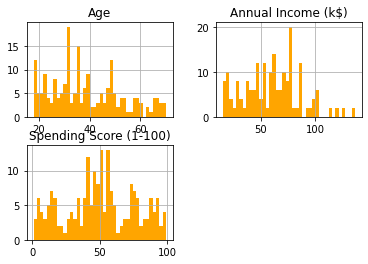

In [17]:
p = df.hist(bins=40, color = 'Orange')

In [21]:
df['Male'] = pd.get_dummies(data['Gender'], drop_first=True)

In [19]:
df.drop('Gender', axis=1, inplace=True)

In [22]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [26]:
X = df[['Spending Score (1-100)','Annual Income (k$)']]
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_tfm = sc.fit_transform(X)
X = pd.DataFrame(X_tfm, columns=X.columns)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
y[:10]

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3])

In [27]:
data['Group'] = y

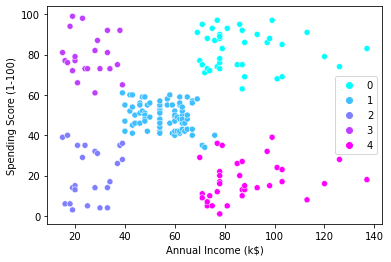

In [29]:
sns.scatterplot(y='Spending Score (1-100)', x='Annual Income (k$)',hue='Group', data=data, palette='cool')
plt.legend(loc = 'best')